In [2]:
def parse_input(is_test=True):
    file_name = "input-test.txt" if is_test else "input.txt"
    with open(file_name, "r") as file:
        result = list()
        for line in file:
            tmp = line.strip().split()
            initial_pos = tuple(int(num) for num in tmp[0].split("=")[1].split(",")[::-1])
            d = tuple(int(num) for num in tmp[1].split("=")[1].split(",")[::-1])
            result.append([initial_pos, d])

        return result

In [3]:
def get_grid_dim(is_test=True):
    height = 7 if is_test else 103
    width = 11 if is_test else 101
    return (height, width)

In [4]:
def teleport(grid_dim: tuple, initial_pos: tuple, d: tuple, duration: int) -> tuple:
    return ((initial_pos[0] + duration * d[0]) % grid_dim[0], (initial_pos[1] + duration * d[1]) % grid_dim[1])

In [5]:
def get_robots_count(inputs: list, grid_dim: tuple, duration: int):
    result = dict()

    for initial_pos, d in inputs:
        current_pos = teleport(grid_dim, initial_pos, d, duration)
        if current_pos not in result:
            result[current_pos] = 1
        else:
            result[current_pos] += 1

    return result

In [6]:
def get_mid_row_col(grid_dim: tuple) -> tuple:
    return (grid_dim[0] // 2, grid_dim[1] // 2)

In [7]:
def calculate_safety_factor(robots_count: dict, grid_dim: tuple) -> int:
    mid_row_col = get_mid_row_col(grid_dim)
    mid_row, mid_col = mid_row_col
    grid_row_length, grid_col_length = grid_dim

    # Q1
    q1_robots_count = 0
    for i1 in range(0, mid_row):
        for j1 in range(mid_col + 1, grid_col_length):
            if (i1, j1) in robots_count:
                q1_robots_count += robots_count[(i1, j1)]

    # Q2
    q2_robots_count = 0
    for i2 in range(0, mid_row):
        for j2 in range(0, mid_col):
            if (i2, j2) in robots_count:
                q2_robots_count += robots_count[(i2, j2)]

    # Q3
    q3_robots_count = 0
    for i3 in range(mid_row + 1, grid_row_length):
        for j3 in range(0, mid_col):
            if (i3, j3) in robots_count:
                q3_robots_count += robots_count[(i3, j3)]

    # Q4
    q4_robots_count = 0
    for i4 in range(mid_row + 1, grid_row_length):
        for j4 in range(mid_col + 1, grid_col_length):
            if (i4, j4) in robots_count:
                q4_robots_count += robots_count[(i4, j4)]

    return q1_robots_count * q2_robots_count * q3_robots_count * q4_robots_count

In [8]:
def solve_part_1(duration: int):
    inputs = parse_input(is_test=False)
    grid_dim = get_grid_dim(is_test=False)
    robots_count = get_robots_count(inputs, grid_dim, duration)
    result = calculate_safety_factor(robots_count, grid_dim)
    return result

In [9]:
solve_part_1(100)

222062148

min safety factor occurs at duration 7520 with the value 52113600


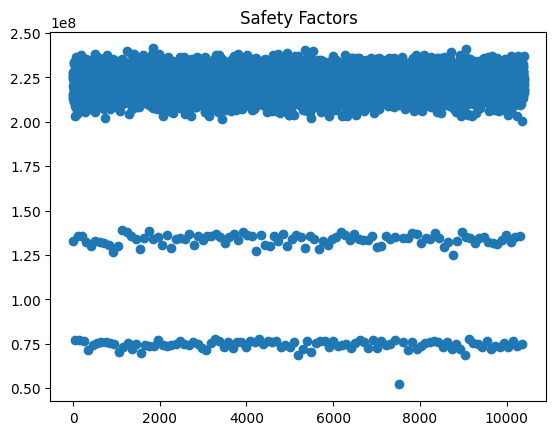

In [10]:
import matplotlib.pyplot as plt
import numpy as np

grid_dim = get_grid_dim(is_test=False)
duration_before_loop = grid_dim[0] * grid_dim[1]
x_points = np.array([i for i in range(duration_before_loop)])
y_points = np.array([solve_part_1(i) for i in range(duration_before_loop)])
min_safety_factor_duration, min_safety_factor_value = np.argmin(y_points), np.min(y_points)
print(f"min safety factor occurs at duration {min_safety_factor_duration} with the value {min_safety_factor_value}")

plt.plot(x_points, y_points, "o")
plt.title("Safety Factors")
plt.show()

In [11]:
def draw_christmas_tree():
    min_safety_factor_duration = 7520
    inputs = parse_input(is_test=False)
    grid_dim = get_grid_dim(is_test=False)

    min_safety_factor_robots_count = get_robots_count(inputs, grid_dim, min_safety_factor_duration)

    result = [["." for _ in range(grid_dim[1])] for _ in range(grid_dim[0])]
    for i in range(len(result)):
        for j in range(len(result[0])):
            if (i, j) in min_safety_factor_robots_count:
                result[i][j] = "#"

    with open("christmas-tree.txt", "w") as file:
        file.writelines([f'{"".join(row)}\n' for row in result])


draw_christmas_tree()